In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.8 MB/s eta 0:00:00


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Weather Forecasting (Pakistan)/open_meteo.csv')

In [5]:
df

,Unnamed: 0,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,0,2010-01-01,0,26.0,14.8,20.9,24.0,13.4,18.6,2010-01-01T02:16,...,0.0,18.3,25.6,54,4.38,24.900002,67.0,8.0,Pakistan,Karachi
1,1,2010-01-02,2,25.3,15.6,20.5,21.8,13.7,18.1,2010-01-02T02:17,...,0.0,24.6,35.3,64,3.84,24.900002,67.0,8.0,Pakistan,Karachi
2,2,2010-01-03,0,25.0,14.3,19.9,22.8,14.2,18.9,2010-01-03T02:17,...,0.0,16.6,28.1,312,3.69,24.900002,67.0,8.0,Pakistan,Karachi
3,3,2010-01-04,0,25.6,15.0,20.4,23.9,13.7,19.4,2010-01-04T02:17,...,0.0,14.0,22.7,353,3.63,24.900002,67.0,8.0,Pakistan,Karachi
4,4,2010-01-05,0,25.4,16.3,20.7,24.5,16.8,20.7,2010-01-05T02:17,...,0.0,19.3,29.2,270,3.55,24.900002,67.0,8.0,Pakistan,Karachi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34757,34757,2023-08-02,51,30.2,25.5,27.4,31.5,27.8,29.3,2023-08-02T00:52,...,6.0,37.7,58.3,238,4.07,23.300003,69.7,105.0,India,Bhuj
34758,34758,2023-08-03,51,30.4,25.4,27.3,31.5,28.2,29.7,2023-08-03T00:52,...,10.0,36.4,56.2,238,3.92,23.300003,69.7,105.0,India,Bhuj
34759,34759,2023-08-04,51,30.5,25.5,27.5,32.8,29.3,30.6,2023-08-04T00:52,...,6.0,31.8,49.3,234,3.75,23.300003,69.7,105.0,India,Bhuj
34760,34760,2023-08-05,51,30.7,25.6,27.5,32.5,28.9,30.4,2023-08-05T00:53,...,6.0,30.7,48.6,239,4.10,23.300003,69.7,105.0,India,Bhuj


In [6]:
df.describe()

,Unnamed: 0,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.0,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000
mean,17380.500000,24.229417,30.677150,23.205748,26.674475,33.920612,26.026771,29.564956,19.105281,4.496036,4.496036,0.0,5.321788,18.603832,34.039563,224.866089,4.568428,17.900002,72.585718,26.000000
std,10035.069365,27.551242,3.236343,3.615309,2.733634,4.309410,5.710073,4.509885,5.091534,12.391169,12.391169,0.0,8.286665,6.353607,9.502845,98.786400,1.553584,5.478609,3.055919,32.789843
min,0.000000,0.000000,17.700000,6.800000,13.200000,11.800000,1.400000,7.600000,0.720000,0.000000,0.000000,0.0,0.000000,4.000000,13.700000,0.000000,0.700000,8.500000,67.000000,6.000000
25%,8690.250000,1.000000,28.300000,21.700000,25.500000,31.800000,23.500000,28.200000,16.670000,0.000000,0.000000,0.0,0.000000,14.000000,27.000000,193.000000,3.620000,12.900002,69.700000,8.000000
50%,17380.500000,2.000000,30.500000,24.200000,26.800000,34.400000,27.900000,30.500000,19.570000,0.000000,0.000000,0.0,0.000000,17.300000,32.800000,251.000000,4.520000,19.099998,72.900010,12.000000
75%,26070.750000,53.000000,32.800000,25.500000,28.300000,36.800000,29.800000,32.400000,22.610000,2.800000,2.800000,0.0,9.000000,22.000000,39.200000,297.000000,5.460000,23.300003,74.900010,22.000000
max,34761.000000,65.000000,44.300000,32.500000,37.100000,47.100000,37.400000,41.100000,29.320000,307.900000,307.900000,0.0,24.000000,78.700000,123.500000,360.000000,13.280000,24.900002,76.899994,105.000000


In [7]:
df['snowfall_sum']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34757    0.0
34758    0.0
34759    0.0
34760    0.0
34761    0.0
Name: snowfall_sum, Length: 34762, dtype: float64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'weathercode'}>,
        <Axes: title={'center': 'temperature_2m_max'}>,
        <Axes: title={'center': 'temperature_2m_min'}>],
       [<Axes: title={'center': 'temperature_2m_mean'}>,
        <Axes: title={'center': 'apparent_temperature_max'}>,
        <Axes: title={'center': 'apparent_temperature_min'}>,
        <Axes: title={'center': 'apparent_temperature_mean'}>],
       [<Axes: title={'center': 'shortwave_radiation_sum'}>,
        <Axes: title={'center': 'precipitation_sum'}>,
        <Axes: title={'center': 'rain_sum'}>,
        <Axes: title={'center': 'snowfall_sum'}>],
       [<Axes: title={'center': 'precipitation_hours'}>,
        <Axes: title={'center': 'windspeed_10m_max'}>,
        <Axes: title={'center': 'windgusts_10m_max'}>,
        <Axes: title={'center': 'winddirection_10m_dominant'}>],
       [<Axes: title={'center': 'et0_fao_evapotranspiration'}>,
        <Axes: title={'center': 'lat

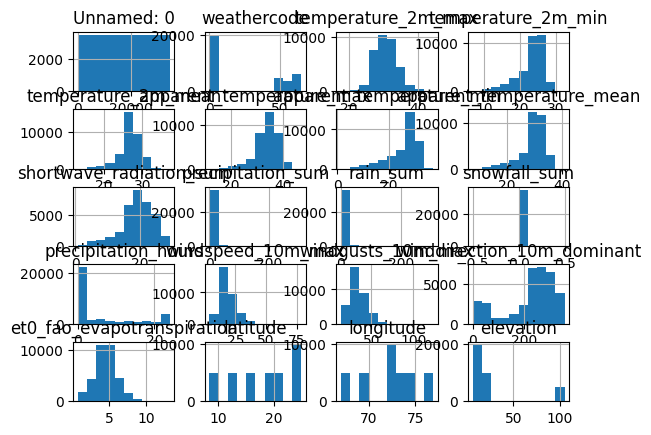

In [8]:
df.hist()

In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
Unnamed: 0,1.000000,-0.107879,0.253422,-0.105858,0.079571,0.059212,-0.129391,-0.061620,0.011934,-0.011049,-0.011049,NaN,-0.064496,0.008174,-0.041737,-0.128601,0.190560,0.345832,-0.048582,0.636039
weathercode,-0.107879,1.000000,-0.392992,0.419267,0.043782,0.036986,0.463978,0.312140,-0.565586,0.492457,0.492457,NaN,0.798948,-0.039648,0.163460,0.159036,-0.648821,-0.421010,0.406406,-0.155695
temperature_2m_max,0.253422,-0.392992,1.000000,0.365717,0.795381,0.770722,0.318922,0.533749,0.627918,-0.316834,-0.316834,NaN,-0.467669,0.119650,0.051895,0.048061,0.737156,0.253616,-0.211563,0.229160
temperature_2m_min,-0.105858,0.419267,0.365717,1.000000,0.843610,0.710549,0.968075,0.915501,0.008572,0.173475,0.173475,NaN,0.304305,0.244884,0.311227,0.276874,-0.040588,-0.206134,0.210776,-0.202132
temperature_2m_mean,0.079571,0.043782,0.795381,0.843610,1.000000,0.891157,0.799000,0.893863,0.361263,-0.070939,-0.070939,NaN,-0.074027,0.208472,0.204802,0.212013,0.392291,0.013793,0.018189,-0.004018
apparent_temperature_max,0.059212,0.036986,0.770722,0.710549,0.891157,1.000000,0.744511,0.903462,0.421582,-0.118883,-0.118883,NaN,-0.124040,-0.129664,-0.063489,0.205724,0.299954,-0.181135,0.216976,-0.113672
apparent_temperature_min,-0.129391,0.463978,0.318922,0.968075,0.799000,0.744511,1.000000,0.951362,0.002994,0.171246,0.171246,NaN,0.326801,0.104405,0.204036,0.334189,-0.128792,-0.290937,0.286477,-0.236515
apparent_temperature_mean,-0.061620,0.312140,0.533749,0.915501,0.893863,0.903462,0.951362,1.000000,0.164722,0.063904,0.063904,NaN,0.158033,-0.005024,0.091390,0.300309,0.028675,-0.259233,0.270035,-0.208277
shortwave_radiation_sum,0.011934,-0.565586,0.627918,0.008572,0.361263,0.421582,0.002994,0.164722,1.000000,-0.603163,-0.603163,NaN,-0.678171,0.076481,-0.044808,0.107222,0.861679,0.102105,-0.111216,0.082669
precipitation_sum,-0.011049,0.492457,-0.316834,0.173475,-0.070939,-0.118883,0.171246,0.063904,-0.603163,1.000000,1.000000,NaN,0.670490,0.095223,0.274753,0.061396,-0.528913,-0.158975,0.168693,-0.103462


In [10]:
df.isnull().sum()

Unnamed: 0                    0
time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
dtype: int64

In [11]:
df = df.drop(columns=['snowfall_sum','Unnamed: 0'])

In [12]:
df

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,0,26.0,14.8,20.9,24.0,13.4,18.6,2010-01-01T02:16,2010-01-01T12:54,...,0.0,18.3,25.6,54,4.38,24.900002,67.0,8.0,Pakistan,Karachi
1,2010-01-02,2,25.3,15.6,20.5,21.8,13.7,18.1,2010-01-02T02:17,2010-01-02T12:54,...,0.0,24.6,35.3,64,3.84,24.900002,67.0,8.0,Pakistan,Karachi
2,2010-01-03,0,25.0,14.3,19.9,22.8,14.2,18.9,2010-01-03T02:17,2010-01-03T12:55,...,0.0,16.6,28.1,312,3.69,24.900002,67.0,8.0,Pakistan,Karachi
3,2010-01-04,0,25.6,15.0,20.4,23.9,13.7,19.4,2010-01-04T02:17,2010-01-04T12:56,...,0.0,14.0,22.7,353,3.63,24.900002,67.0,8.0,Pakistan,Karachi
4,2010-01-05,0,25.4,16.3,20.7,24.5,16.8,20.7,2010-01-05T02:17,2010-01-05T12:56,...,0.0,19.3,29.2,270,3.55,24.900002,67.0,8.0,Pakistan,Karachi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34757,2023-08-02,51,30.2,25.5,27.4,31.5,27.8,29.3,2023-08-02T00:52,2023-08-02T14:03,...,6.0,37.7,58.3,238,4.07,23.300003,69.7,105.0,India,Bhuj
34758,2023-08-03,51,30.4,25.4,27.3,31.5,28.2,29.7,2023-08-03T00:52,2023-08-03T14:02,...,10.0,36.4,56.2,238,3.92,23.300003,69.7,105.0,India,Bhuj
34759,2023-08-04,51,30.5,25.5,27.5,32.8,29.3,30.6,2023-08-04T00:52,2023-08-04T14:02,...,6.0,31.8,49.3,234,3.75,23.300003,69.7,105.0,India,Bhuj
34760,2023-08-05,51,30.7,25.6,27.5,32.5,28.9,30.4,2023-08-05T00:53,2023-08-05T14:01,...,6.0,30.7,48.6,239,4.10,23.300003,69.7,105.0,India,Bhuj


In [13]:
Karachi_df = df[df['city']== 'Karachi']

In [14]:
Karachi_df

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,0,26.0,14.8,20.9,24.0,13.4,18.6,2010-01-01T02:16,2010-01-01T12:54,...,0.0,18.3,25.6,54,4.38,24.900002,67.0,8.0,Pakistan,Karachi
1,2010-01-02,2,25.3,15.6,20.5,21.8,13.7,18.1,2010-01-02T02:17,2010-01-02T12:54,...,0.0,24.6,35.3,64,3.84,24.900002,67.0,8.0,Pakistan,Karachi
2,2010-01-03,0,25.0,14.3,19.9,22.8,14.2,18.9,2010-01-03T02:17,2010-01-03T12:55,...,0.0,16.6,28.1,312,3.69,24.900002,67.0,8.0,Pakistan,Karachi
3,2010-01-04,0,25.6,15.0,20.4,23.9,13.7,19.4,2010-01-04T02:17,2010-01-04T12:56,...,0.0,14.0,22.7,353,3.63,24.900002,67.0,8.0,Pakistan,Karachi
4,2010-01-05,0,25.4,16.3,20.7,24.5,16.8,20.7,2010-01-05T02:17,2010-01-05T12:56,...,0.0,19.3,29.2,270,3.55,24.900002,67.0,8.0,Pakistan,Karachi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,2023-08-02,51,30.3,27.0,28.3,32.7,29.8,31.0,2023-08-02T01:00,2023-08-02T14:16,...,5.0,34.6,49.7,246,3.76,24.900002,67.0,8.0,Pakistan,Karachi
4962,2023-08-03,51,30.0,27.0,28.3,32.8,29.8,31.7,2023-08-03T01:00,2023-08-03T14:15,...,6.0,29.2,43.6,243,3.97,24.900002,67.0,8.0,Pakistan,Karachi
4963,2023-08-04,3,30.2,26.8,28.3,33.8,30.9,32.1,2023-08-04T01:01,2023-08-04T14:15,...,0.0,25.6,40.3,243,3.89,24.900002,67.0,8.0,Pakistan,Karachi
4964,2023-08-05,51,30.0,26.7,28.2,33.5,29.7,31.4,2023-08-05T01:01,2023-08-05T14:14,...,1.0,28.3,43.2,251,4.07,24.900002,67.0,8.0,Pakistan,Karachi


In [15]:
Karachi_df = Karachi_df[['temperature_2m_mean','temperature_2m_min','temperature_2m_max']]

In [16]:
train_data,test_data = Karachi_df[0:int(len(Karachi_df)*0.7)],Karachi_df[int(len(Karachi_df)*0.7):]

In [17]:
from statsmodels.tsa.statespace.varmax import VARMAX
order = (1, 0)
model = VARMAX(train_data, order=order)
results = model.fit(disp=False)
results.summary()

Dep. Variable:,"['temperature_2m_mean', 'temperature_2m_min', 'temperature_2m_max']",No. Observations:,3476
Model:,VAR(1),Log Likelihood,-10893.885
,+ intercept,AIC,21823.770
Date:,"Thu, 24 Aug 2023",BIC,21934.535
Time:,16:10:20,HQIC,21863.315
Sample:,0,,
,- 3476,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"50.01, 11.30, 4.80",Jarque-Bera (JB):,"2240.62, 518.43, 331.96"
Prob(Q):,"0.00, 0.00, 0.03",Prob(JB):,"0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.92, 0.94, 0.94",Skew:,"-0.18, -0.17, -0.14"


In [18]:
import statsmodels.api as sm

In [19]:
for i in range(5):
    i += 1
    model = sm.tsa.VARMAX(train_data, order=(i,0))
    model_result = model.fit(maxiter=1000, disp=False)
    print('Order = ', i)
    print('AIC: ', model_result.aic)
    print('BIC: ', model_result.bic)
    print('HQIC: ', model_result.hqic)


Order =  1
AIC:  21823.76990240391
BIC:  21934.535377158845
HQIC:  21863.314611625014
Order =  2
AIC:  21512.771741653996
BIC:  21678.9199537864
HQIC:  21572.088805485655
Order =  3
AIC:  21336.04613398718
BIC:  21557.57708349705
HQIC:  21415.13555242939
Order =  4
AIC:  21261.086590593717
BIC:  21538.000277481056
HQIC:  21359.94836364648
Order =  5
AIC:  21224.824685030882
BIC:  21557.121109295687
HQIC:  21343.458812694196


In [26]:
n_forecast = len(test_data)
forecast = results.forecast(steps=n_forecast)
forecast

,temperature_2m_mean,temperature_2m_min,temperature_2m_max
3476,30.425774,28.160053,33.654365
3477,30.360062,28.018245,33.626612
3478,30.296256,27.904032,33.599394
3479,30.232921,27.799633,33.569285
3480,30.169850,27.700310,33.536120
...,...,...,...
4961,26.217352,22.399097,30.566917
4962,26.217352,22.399097,30.566917
4963,26.217352,22.399097,30.566917
4964,26.217352,22.399097,30.566917


In [30]:
forecast = forecast.rename({"temperature_2m_mean":"forecast_temperature_2m_mean",'temperature_2m_min':'forecast_temperature_2m_min','temperature_2m_max':"forecast_temperature_2m_max"},axis=1)

In [31]:
forecast

,forecast_temperature_2m_mean,forecast_temperature_2m_min,forecast_temperature_2m_max
3476,30.425774,28.160053,33.654365
3477,30.360062,28.018245,33.626612
3478,30.296256,27.904032,33.599394
3479,30.232921,27.799633,33.569285
3480,30.169850,27.700310,33.536120
...,...,...,...
4961,26.217352,22.399097,30.566917
4962,26.217352,22.399097,30.566917
4963,26.217352,22.399097,30.566917
4964,26.217352,22.399097,30.566917


In [32]:
pd.concat([test_data, forecast], axis=1)

,temperature_2m_mean,temperature_2m_min,temperature_2m_max,forecast_temperature_2m_mean,forecast_temperature_2m_min,forecast_temperature_2m_max
3476,30.6,28.4,33.2,30.425774,28.160053,33.654365
3477,30.8,28.7,33.8,30.360062,28.018245,33.626612
3478,30.4,28.5,32.7,30.296256,27.904032,33.599394
3479,30.3,28.5,33.0,30.232921,27.799633,33.569285
3480,30.2,28.4,32.4,30.169850,27.700310,33.536120
...,...,...,...,...,...,...
4961,28.3,27.0,30.3,26.217352,22.399097,30.566917
4962,28.3,27.0,30.0,26.217352,22.399097,30.566917
4963,28.3,26.8,30.2,26.217352,22.399097,30.566917
4964,28.2,26.7,30.0,26.217352,22.399097,30.566917


In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse = mean_squared_error(test_data, forecast)

In [35]:
mse

19.902406001698626